<a href="https://colab.research.google.com/github/Shyam-G-Sundhar/SNS_Iris_Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [127]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [128]:
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [129]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [131]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [132]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [133]:
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()
df['species']= lr.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Axes: >

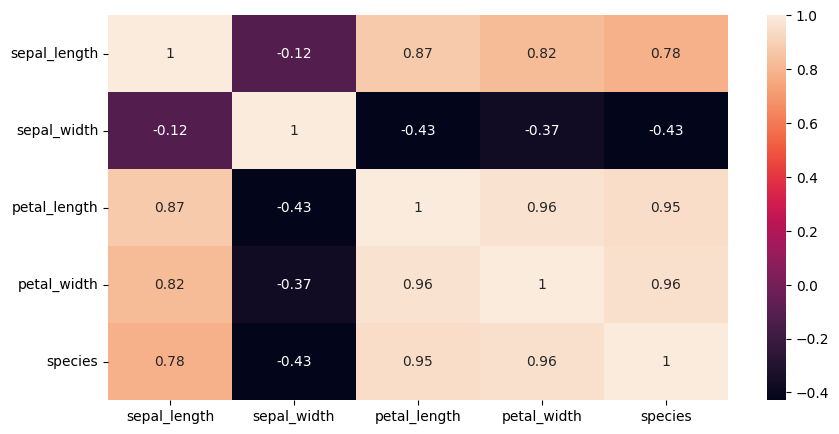

In [134]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)


<Axes: xlabel='petal_length', ylabel='petal_width'>

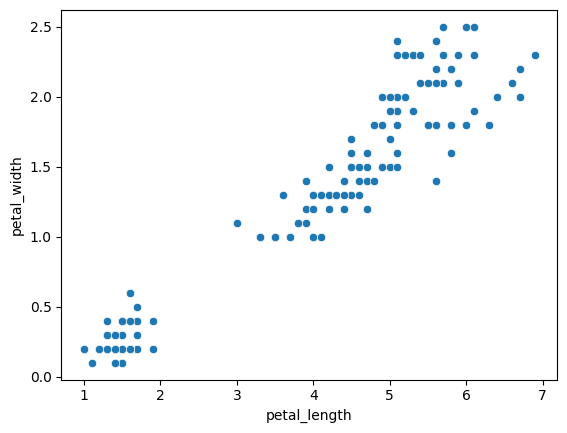

In [135]:
sns.scatterplot(x='petal_length', y='petal_width', data=df)

In [136]:
from sklearn.model_selection import train_test_split,cross_val_score
x= df.drop('species',axis=1)
y= df['species']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [137]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score

pipeline={

    'knn':
    Pipeline([
        ('scaler',StandardScaler()),
    ('knn',KNeighborsClassifier()),
    ]),
    'svc':
    Pipeline([
        ('scaler',StandardScaler()),
    ('svc',SVC()),
    ]),
    'dtc':
    Pipeline([
        ('scaler',StandardScaler()),
    ('dtc',DecisionTreeClassifier()),
    ]),
     'logisticregression':Pipeline([
         ('scaler',StandardScaler()),
    ('lr',LogisticRegression()),
    ]),
    'rfc':
    Pipeline([
        ('scaler',StandardScaler()),
    ('rfc',RandomForestClassifier())
    ])
}

In [139]:
def evalmodel(pipelines,x_train,y_train):
  for name,model in pipelines.items():
    res={}
    scores=cross_val_score(model,x_train,y_train,cv=5)
    res[name]=scores
    print(f'{name} accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})')
  return res

In [140]:
results= evalmodel(pipeline,x_train,y_train)
topmodel_name=max(results,key=lambda key: np.mean(results[key]))
topmodel= pipeline[topmodel_name]
topmodel.fit(x_train,y_train)
y_pred= topmodel.predict(x_test)

knn accuracy: 0.97 (+/- 0.05)
svc accuracy: 0.95 (+/- 0.03)
dtc accuracy: 0.93 (+/- 0.02)
logisticregression accuracy: 0.96 (+/- 0.03)
rfc accuracy: 0.94 (+/- 0.04)


In [141]:
print(topmodel_name)

rfc


<Axes: xlabel='species'>

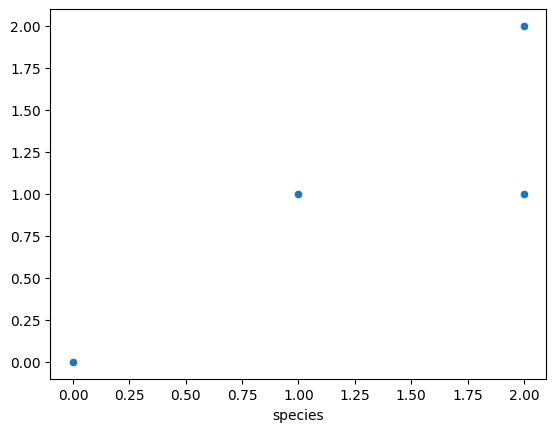

In [142]:
sns.scatterplot(x=y_test,y=y_pred)

In [143]:
topmodel.predict([[6.2,3.4,5.4,2.3]]).reshape(-1,1)

array([[2]])